# k Nearest Neighbours

In [1]:
import numpy as np
import matplotlib.pyplot as plt

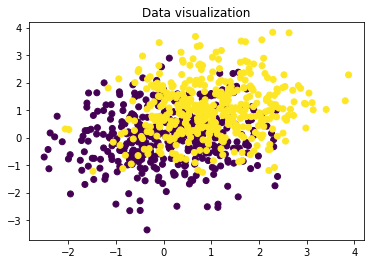

In [3]:
mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')
plt.show()

In [4]:
def euclidean_distance(train, test_row):
    return np.linalg.norm((train-test_row), axis=1)

In [5]:
def get_neighbors(train, label_train, test_row, num_neighbors):
    euclidean_norm = euclidean_distance(train, test_row)
#     print(euclidean_norm.shape)
    index = np.argsort(euclidean_norm)[:num_neighbors]
    return label_train[index]

In [6]:
def predict_classification(neighbors):
    counts = np.bincount(neighbors)
    return np.argmax(counts)

In [7]:
# test data generation
data_test = np.concatenate((data1[-100:],data2[-100:]))
label_test = np.concatenate((np.zeros(100),np.ones(100)))

In [8]:
K = 2
pred_label = np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
    neig = get_neighbors(data_train,label, data_test[i,:], K)
    pred_label[i] = predict_classification(neig.astype(np.int32))

accuracy = (len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy =',accuracy,'%')

Testing Accuracy = 65.5 %
